# Example Big-M

$$\max Z = 2x_1 + 3x_2$$

\begin{align*}
x_1 + x_2 & \leq 30\\
x_2 & \geq 3\\
x_2 & \leq 12\\
x_1 - x_2 & \geq 0\\
x_1  & \leq 20 \\[5mm]
x_1, x_2 & \geq 0
\end{align*}


In [41]:
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt

In [42]:
%run "analytical_method.ipynb"
%run "simplex_algorithm.ipynb"

In [43]:
x = np.linspace(0, 50, 100)

eq1 = 30 - x  # x2 <=
eq2 = 3       # x2 >=
eq3 = 12      # x2 <=
eq4 = x       # x2 <=
eq5 = 20      # x1 <=

zeq = lambda v, c: (c - 2*v) / 3

In [44]:
equations_list = [
    (x, eq1),
    ([0, 100], [eq2, eq2]),
    ([0, 100], [eq3, eq3]),
    (x, eq4),
    ([eq5, eq5], [0, 100]),
    ]

equations_label = [
    r'$x_1 + x_2 = 30$',
    r'$x_2 = 3$',
    r'$x_2 = 12$',
    r'$x_1 - x_2 = 0$',
    r'$x_1  = 20$',
    r'$x_1, x_2 = 0$',
    ]

In [45]:
cj_trial = np.array([2,3,0,0,0,0,0], dtype=float)

A_trial = np.array([
    [1,  1, 1,  0, 0,  0, 0],
    [0,  1, 0, -1, 0,  0, 0],
    [0,  1, 0,  0, 1,  0, 0],
    [1, -1, 0,  0, 0, -1, 0],
    [1,  0, 0,  0, 0,  0, 1],
    ]
    , dtype=float)

b_trial = np.array([30, 3, 12, 0, 20], dtype=float)

In [46]:
feasibles, infeasibles, best_vector = analytical(matrix=A_trial, rhs=b_trial, objcoef=cj_trial)
allpoints = sorted(feasibles[ :, :2], key=lambda t: t[0], reverse=True)
coordinates = [*zip(*allpoints)]

Singular Matrix with variables (0, 1, 2, 5, 6)
Singular Matrix with variables (0, 2, 3, 5, 6)
Singular Matrix with variables (0, 2, 4, 5, 6)
Singular Matrix with variables (1, 2, 3, 4, 5)


In [47]:
print(feasibles)

[[12. 12.  6.  9.  0.  0.  8. 60.]
 [20.  3.  7.  0.  9. 17.  0. 49.]
 [ 3.  3. 24.  0.  9.  0. 17. 15.]
 [20. 10.  0.  7.  2. 10.  0. 70.]
 [18. 12.  0.  9.  0.  6.  2. 72.]]


In [48]:
cj = np.array([2,3,0,0,0,0,0,-1000,-1000], dtype=float)

A = np.array([
    [1,  1, 1,  0, 0,  0, 0,  0, 0],
    [0,  1, 0, -1, 0,  0, 0,  1, 0],
    [0,  1, 0,  0, 1,  0, 0,  0, 0],
    [1, -1, 0,  0, 0, -1, 0,  0, 1],
    [1,  0, 0,  0, 0,  0, 1,  0, 0],
    ]
    , dtype=float)

b = np.array([30, 3, 12, 0, 20], dtype=float)

In [49]:
solutions, zvalues = simplex(matrix=A, rhs=b, z=cj, numxvars=2, direction=1)
points = solutions[:, :2]

Iteration 1
[[ 0.  2.  1.  0.  0.  1.  0.  0. -1.]
 [ 0.  1.  0. -1.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  1.  0.  0.  0.  0.]
 [ 1. -1.  0.  0.  0. -1.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  1.  1.  0. -1.]] 

Solution [ 0.  0. 30.  0. 12.  0. 20.  3.  0.] 	Z: -3000.00 

Iteration 2
[[ 0.  0.  1.  2.  0.  1.  0. -2. -1.]
 [ 0.  1.  0. -1.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  1.  0.  0. -1.  0.]
 [ 1.  0.  0. -1.  0. -1.  0.  1.  1.]
 [ 0.  0.  0.  1.  0.  1.  1. -1. -1.]] 

Solution [ 3.  3. 24.  0.  9.  0. 17.  0.  0.] 	Z: 15.00 

Iteration 3
[[ 0.  0.  1.  0. -2.  1.  0.  0. -1.]
 [ 0.  1.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  0.  0. -1.  0.]
 [ 1.  0.  0.  0.  1. -1.  0.  0.  1.]
 [ 0.  0.  0.  0. -1.  1.  1.  0. -1.]] 

Solution [12. 12.  6.  9.  0.  0.  8.  0.  0.] 	Z: 60.00 

Iteration 4
[[ 0.  0.  1.  0. -2.  1.  0.  0. -1.]
 [ 0.  1.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  0.  0. -1.  0.]
 [ 1.  0.  1.  0. -1.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  1. 

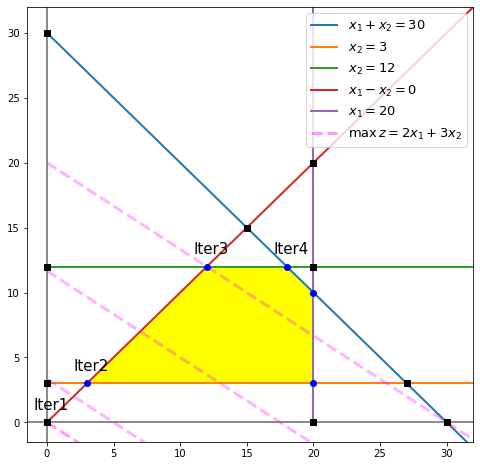

In [52]:
plt.figure(figsize=(8,8))
plt.axvline(0, color='0.4')
plt.axhline(0, color='0.4')

for eq, eqlabel in zip(equations_list, equations_label):
    plt.plot(*eq, lw=2, label=eqlabel)

plt.plot(x, zeq(x, 0), lw=3, ls="--", color="magenta", alpha=0.4, label=r'$\max\, z = 2x_1 + 3x_2 $')

for z in np.linspace(10,60, 3):
    plt.plot(x, zeq(x, z), lw=3, ls="--", color='magenta', alpha=0.3 )

plt.fill(*coordinates, facecolor="yellow")

for point in allpoints:
    plt.plot(*point, color="blue", marker="o")

for point in infeasibles[:, :2]:
    plt.plot(*point, color="k", marker="s")
    
for i, point in enumerate(points):
    plt.annotate(f"Iter{i+1}", xy=point, xytext=(point[0] - 1, point[1] + 1 ), fontsize=15)
    
    
plt.xlim(-1.5,32)
plt.ylim(-1.5, 32)
plt.legend(fontsize=13, loc="upper right")
plt.show()